In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the data frame
ins = pd.read_csv('insurance.csv')

# Calculate the number of missing values in each column
missing_counts = ins.isna().sum(axis=0)

# Print the results
print(missing_counts)



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
# Display the structure of the data frame
print(ins.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


<Axes: xlabel='region'>

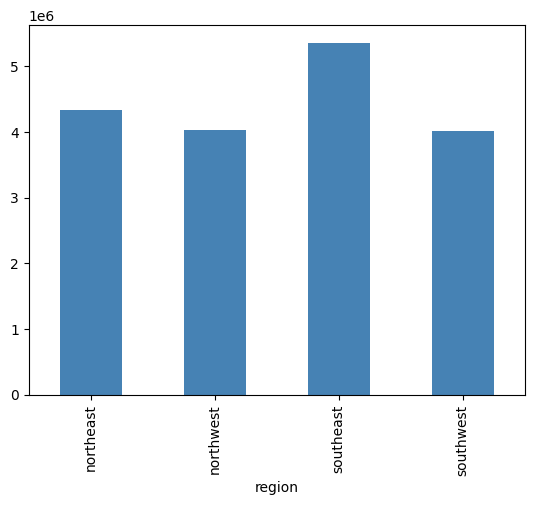

In [ ]:
# insurance claims is maximum in which region
ins.groupby('region')['charges'].sum().plot(kind='bar', color='steelblue')

<Axes: xlabel='sex'>

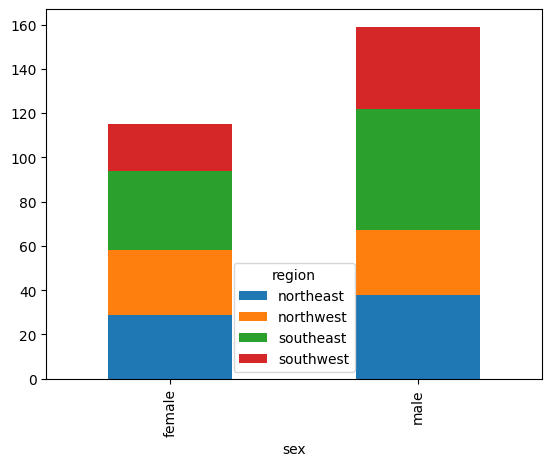

In [ ]:
# smokers
ins.groupby(['sex', 'region'])['smoker'].apply(lambda x: (x == 'yes').sum()).unstack().plot(kind='bar', stacked=True)

In [ ]:
import numpy as np
import pandas as pd

# Assuming you have loaded or created a DataFrame named `ins`
ins['smoker_num'] = np.where(ins['smoker'] == 'yes', 1, 0)
ins['smoker_num'] = pd.Categorical(ins['smoker_num'])


<ipython-input-23-829d3c3afb7c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ins1['smoker_num'] = pd.to_numeric(ins1['smoker_num'])


<Axes: >

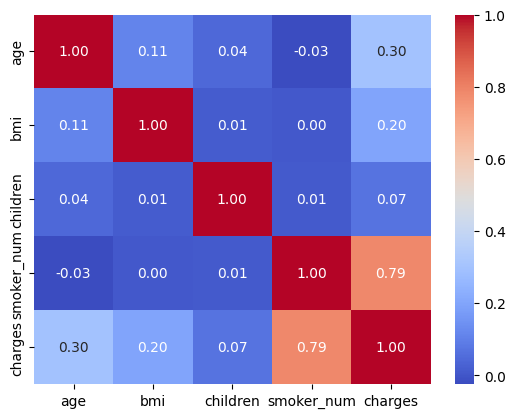

In [ ]:
import seaborn as sns
# correlation between different categories
ins1 = ins[['age', 'bmi', 'children', 'smoker_num', 'charges']]
ins1['smoker_num'] = pd.to_numeric(ins1['smoker_num'])
corr = ins1.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={"size": 10})

<Axes: xlabel='region', ylabel='count'>

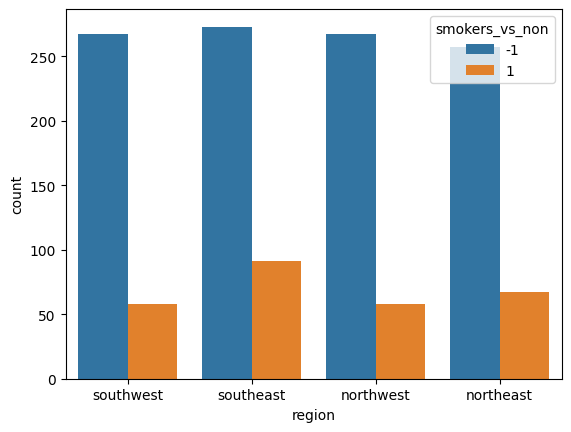

In [ ]:
# concentration of smokers vs non-smokers by region
ins['smokers_vs_non'] = np.where(ins['smoker_num'] == 0, -1, 1)
sns.countplot(x='region', hue='smokers_vs_non', data=ins)

<Axes: xlabel='age', ylabel='charges'>

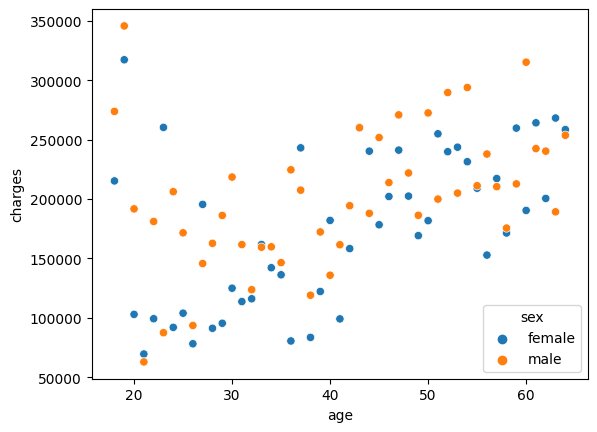

In [ ]:
# charges by different age group
sns.scatterplot(x='age', y='charges', hue='sex', data=ins.groupby(['sex', 'age'])['charges'].sum().reset_index())


<Axes: xlabel='bmi_type', ylabel='charges'>

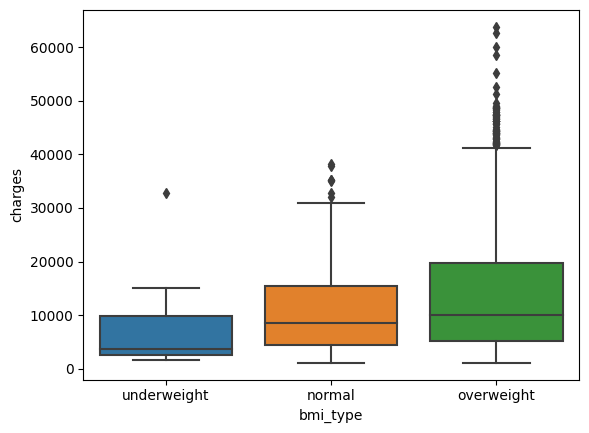

In [ ]:
# charges based on bmi
ins['bmi_type'] = pd.cut(ins['bmi'], bins=[0, 18, 30, float('inf')], labels=['underweight', 'normal', 'overweight'])
sns.boxplot(x='bmi_type', y='charges', data=ins)

<Axes: xlabel='children', ylabel='charges'>

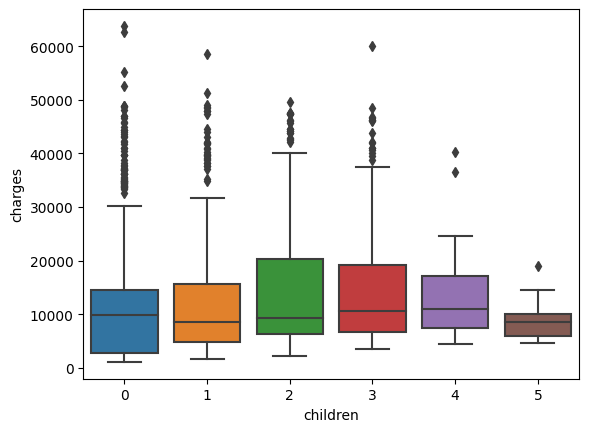

In [ ]:
# charges based on no of children
sns.boxplot(x='children', y='charges', data=ins)

<Axes: xlabel='age_bins', ylabel='charges'>

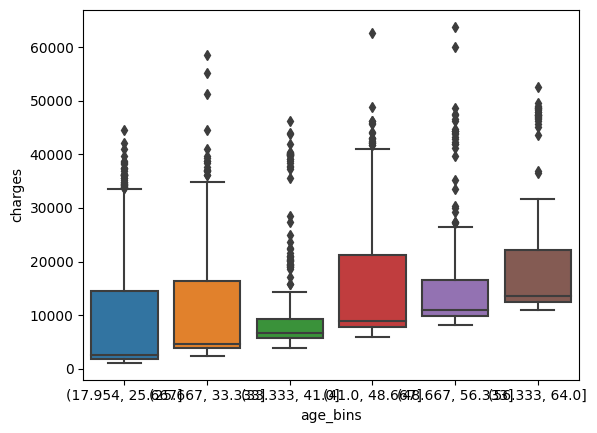

In [ ]:
# charges based on age
ins['age_bins'] = pd.cut(ins['age'], bins=6)
sns.boxplot(x='age_bins', y='charges', data=ins)

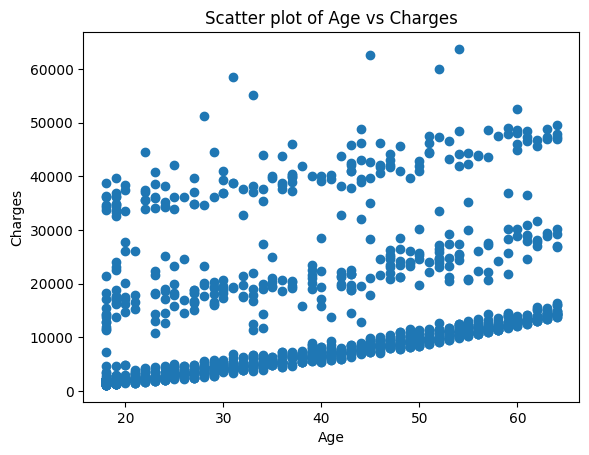

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Selecting columns age and charges from the 'ins' DataFrame
selected_data = ins[['age', 'charges']]

# Creating the scatter plot
plt.scatter(selected_data['age'], selected_data['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scatter plot of Age vs Charges')
plt.show()


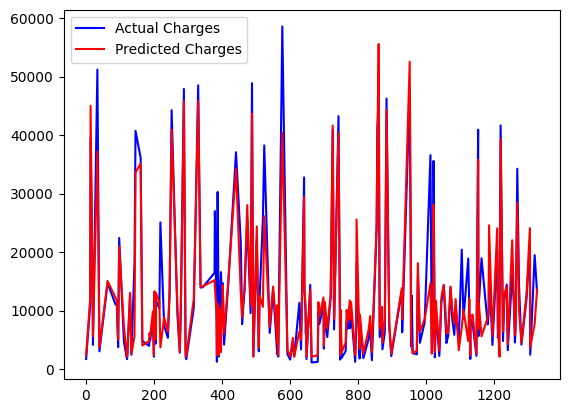

RMSE: 4757.521118649235


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Creating smoker_num column
ins['smoker_num'] = np.where(ins['smoker'] == 'yes', 1, 0)

# Creating ins1 DataFrame
ins1 = ins[['age', 'bmi', 'children', 'smoker_num', 'charges']].copy()

# Converting children column to categorical
ins1['child_cat'] = pd.Categorical(ins1['children'])

# Creating ins2 DataFrame
ins2 = ins1.copy()

# Splitting data into training and testing sets
ins_training = ins2.sample(frac=0.85, random_state=42)
ins_testing = ins2.drop(ins_training.index)

# Creating and fitting linear regression models
m1 = LinearRegression()
m1.fit(ins_training.loc[ins_training['smoker_num'] == 0].drop(['charges', 'smoker_num'], axis=1),
       ins_training.loc[ins_training['smoker_num'] == 0, 'charges'])

m2 = LinearRegression()
m2.fit(ins_training.loc[ins_training['smoker_num'] == 1].drop(['charges', 'smoker_num'], axis=1),
       ins_training.loc[ins_training['smoker_num'] == 1, 'charges'])

# Predicting charges for testing data
ins_testing['pred_hybrid'] = np.where(ins_testing['smoker_num'] == 0,
                                      m1.intercept_ + m1.coef_[0] * ins_testing['age'] +
                                      m1.coef_[1] * ins_testing['bmi'] +
                                      m1.coef_[2] * ins_testing['children'],
                                      m2.intercept_ + m2.coef_[0] * ins_testing['age'] +
                                      m2.coef_[1] * ins_testing['bmi'] +
                                      m2.coef_[2] * ins_testing['children'])

# Plotting charges vs. predicted charges
plt.plot(ins_testing['charges'], color='blue', label='Actual Charges')
plt.plot(ins_testing['pred_hybrid'], color='red', label='Predicted Charges')
plt.legend()
plt.show()

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(ins_testing['charges'], ins_testing['pred_hybrid']))
print('RMSE:', rmse)


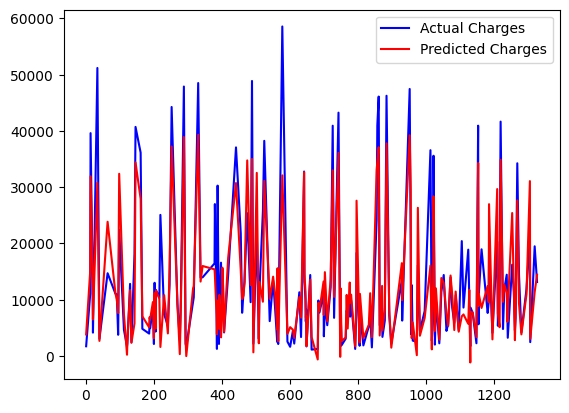

RMSE: 5933.287931095451


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Creating ins2 DataFrame
ins2 = ins1.copy()

# Standardizing the bmi and charges columns
s_dev = np.std(ins2['charges'])
mean_val = np.mean(ins2['charges'])
ins2['bmi'] = (ins2['bmi'] - np.mean(ins2['bmi'])) / np.std(ins2['bmi'])
ins2['charges'] = (ins2['charges'] - mean_val) / s_dev

# Splitting data into training and testing sets
ins_training = ins2.sample(frac=0.85, random_state=42)
ins_testing = ins2.drop(ins_training.index)

# Creating and fitting the linear regression model
linear_model = LinearRegression()
linear_model.fit(ins_training.drop('charges', axis=1), ins_training['charges'])

# Predicting charges for testing data
ins_testing['pred_ins'] = linear_model.predict(ins_testing.drop('charges', axis=1))

# Scaling charges and predicted charges back to original scale
ins_testing['charges'] = ins_testing['charges'] * s_dev + mean_val
ins_testing['pred_ins'] = ins_testing['pred_ins'] * s_dev + mean_val

# Plotting charges vs. predicted charges
plt.plot(ins_testing['charges'], color='blue', label='Actual Charges')
plt.plot(ins_testing['pred_ins'], color='red', label='Predicted Charges')
plt.legend()
plt.show()

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(ins_testing['charges'], ins_testing['pred_ins']))
print('RMSE:', rmse)


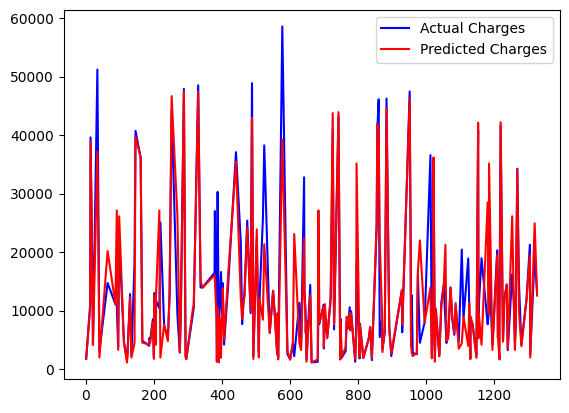

RMSE: 6292.971637913359


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Creating ins2 DataFrame
ins2 = ins1.copy()

# Splitting data into training and testing sets
ins_training = ins2.sample(frac=0.85, random_state=42)
ins_testing = ins2.drop(ins_training.index)

# Creating and fitting the decision tree model
mod = DecisionTreeRegressor()
mod.fit(ins_training.drop('charges', axis=1), ins_training['charges'])

# Predicting charges for testing data
ins_testing['pred'] = mod.predict(ins_testing.drop('charges', axis=1))

# Plotting charges vs. predicted charges
plt.plot(ins_testing['charges'], color='blue', label='Actual Charges')
plt.plot(ins_testing['pred'], color='red', label='Predicted Charges')
plt.legend()
plt.show()

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(ins_testing['charges'], ins_testing['pred']))
print('RMSE:', rmse)


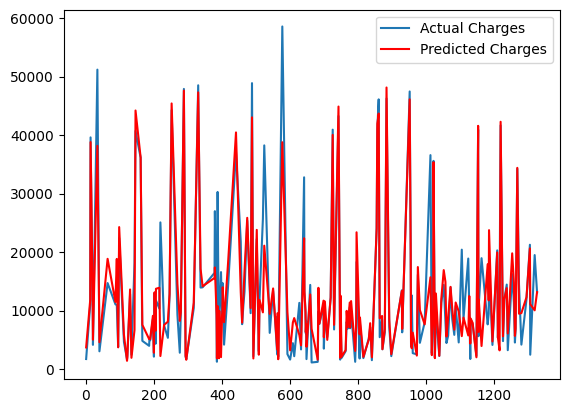

RMSE: 5041.686035250255


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Creating ins2 DataFrame
ins2 = ins1.copy()

# Splitting data into training and testing sets
ins_training = ins2.sample(frac=0.85, random_state=42)
ins_testing = ins2.drop(ins_training.index)

# Creating and fitting the random forest model
mod = RandomForestRegressor(n_estimators=500, max_features=3)
mod.fit(ins_training.drop('charges', axis=1), ins_training['charges'])

# Predicting charges for testing data
ins_testing['pred'] = mod.predict(ins_testing.drop('charges', axis=1))

# Plotting charges vs. predicted charges
plt.plot(ins_testing['charges'], label='Actual Charges')
plt.plot(ins_testing['pred'], color='red', label='Predicted Charges')
plt.legend()
plt.show()

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(ins_testing['charges'], ins_testing['pred']))
print('RMSE:', rmse)
